<a href="https://colab.research.google.com/github/beifa/M5_Forecasting/blob/master/lit_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

файлы

**calendar.csv** - содержит информацию о датах продажи товаров.

**sales_train_validation.csv**- содержит исторические ежедневные данные о единичных продажах для каждого продукта и магазина [d_1 - d_1913]

**sample_submission.csv** - правильный формат для представлений. Обратитесь к вкладке Оценка для получения дополнительной информации.

**sell_prices.csv** - содержит информацию о цене товаров, проданных за магазин, и дате.

**sales_train_evaluation.csv** - доступно за месяц до окончания конкурса. Будет включать продажи [d_1 - d_1941]

This leaderboard is calculated with approximately 50% of the test data.

The final results will be based on the other 50%, so the final standings may be different.

**Таблица 1: Количество серий M5 на уровень агрегации.**


| Level id | Aggregation Level | Number of series |
|----------|-------------------|------------------|
| 1 | Unit sales of all products, aggregated for all stores/states | 1 |
| 2 | Unit sales of all products, aggregated for each State | 3 |
| 3 | Unit sales of all products, aggregated for each store | 10 |
| 4 | Unit sales of all products, aggregated for each category | 3 |
| 5 | Unit sales of all products, aggregated for each department | 7 |
| 6 | Unit sales of all products, aggregated for each State and category | 9 | 
| 7| Unit sales of all products, aggregated for each State and department | 21 |
| 8 | Unit sales of all products, aggregated for each store and category | 30 |
| 9 | Unit sales of all products, aggregated for each store and department | 70 |
| 10 | Unit sales of product x, aggregated for all stores/states | 3.049 |
| 11 | Unit sales of product x, aggregated for each State | 9.147 |
| 12 | Unit sales of product x, aggregated for each store | 30.490 |
| **Total** | | **42.840**|



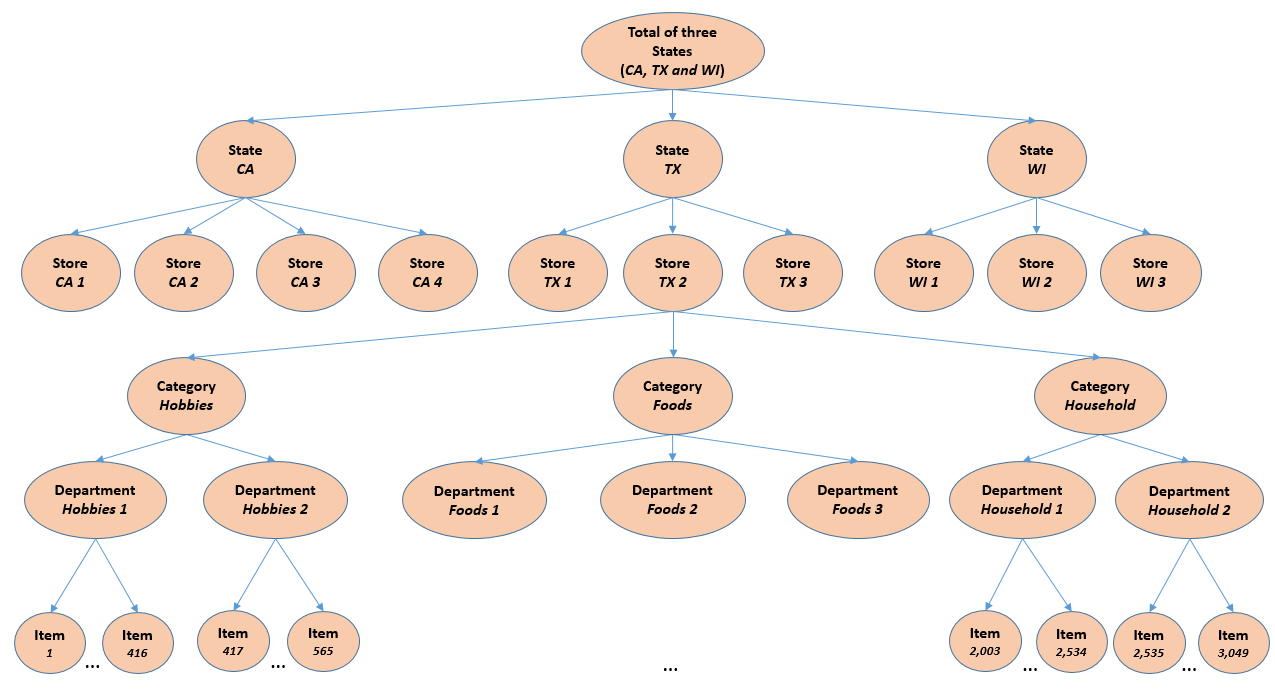

In [ ]:
from IPython.display import Image
path = '/content/drive/My Drive/M5_Forecasting/image26.png'
Image(filename=path)

**Рисунок 1: Обзор того, как организована серия M5.**

Исторические данные варьируются от 2011-01-29 до 2016-06-19.

Таким образом, продукты имеют (максимальную) историю продаж в 1941 день / 5,4 года (данные испытаний h = 28 дней не включены).

The objective of the M5 forecasting competition is to advance the theory and practice of forecasting by
identifying the method(s) that provide the most accurate point forecasts for each of the 42,840 time
series of the competition, as well as the methods that elicit information to estimate the uncertainty
distribution of the realized values of these series as precisely as possible.

![alt text](https://finviz.com/chart.ashx?t=WMT&ty=c&ta=0&p=m&s=l)

In [ ]:
# from IPython.display import Image
# path = '/content/drive/My Drive/M5_Forecasting/wmt.jpg'
# Image(filename=path)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH =  '/content/drive/My Drive/M5_Forecasting/data/'

In [ ]:
!ls '/content/drive/My Drive/M5_Forecasting/data/'

calendar.csv		    sample_submission.csv
sales_train_validation.csv  sell_prices.csv


In [ ]:
calendar = pd.read_csv(PATH + 'calendar.csv')
price = pd.read_csv(PATH + 'sell_prices.csv')
train =  pd.read_csv(PATH + 'sales_train_validation.csv')

#EDA

In [ ]:
"only days data"
day = [f'd_{i}' for i in range(1, 1914)]
series_data = train.loc[:, day].values
series_data

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 6, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 3, 1, 3],
       [0, 0, 0, ..., 0, 0, 0]])

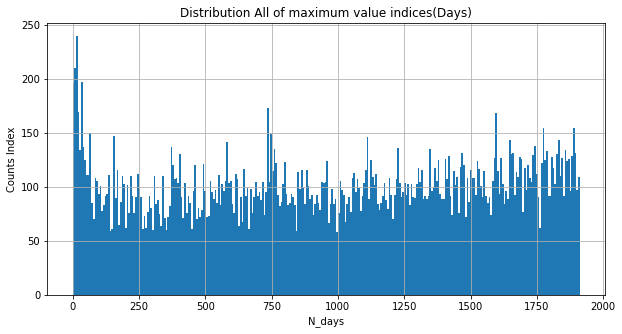

In [ ]:
pd.Series((series_data).argmax(axis = 1)).hist(figsize = (10, 5), bins = 300)
plt.xlabel('N_days')
plt.ylabel('Counts Index')
plt.title('Distribution All of maximum value indices(Days)');

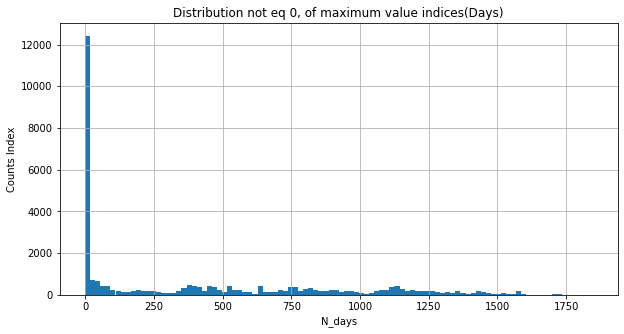

In [ ]:
pd.Series((series_data != 0).argmax(axis = 1)).hist(figsize = (10, 5), bins = 100)
plt.xlabel('N_days')
plt.ylabel('Counts Index')
plt.title('Distribution not eq 0, of maximum value indices(Days)');

У нас есть два распределения.
На первом мы видим что максимальные значения распределены по всем временным частка, в начале есть пик но тем неемение дальше все относительно нормально.

На второй мы видим противоположную картину что преобладающие большенство находится в начале. И это говорит нам о том что в начале много нулей у всех строк и убрав их мы и получили эти максимальные значения и они все совпали с началом.

##Dist in row

0.8(80%) показывает что большенство данных в строке 0

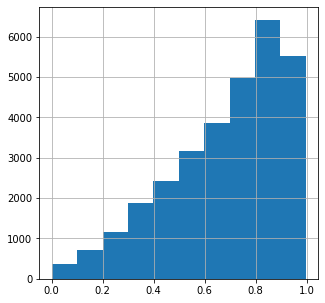

In [ ]:
pd.Series((series_data == 0).sum(axis =1)/series_data.shape[1]).hist(figsize = (5, 5))

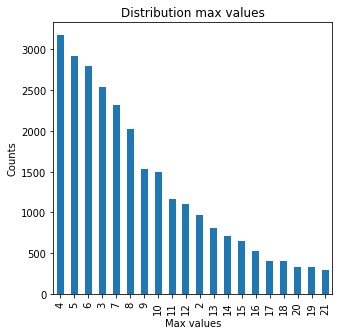

In [ ]:
pd.Series(series_data.max(axis=1)).value_counts().head(20).plot(kind='bar', figsize=(5, 5))
plt.xlabel('Max values')
plt.ylabel('Counts')
plt.title('Distribution max values');

## Same from *kaggle*

In [ ]:
# id10 = np.random.choice(train['id'].unique().tolist(), 10)
# a = train.loc[train['id'].isin(id10)].iloc[:, 6:]

# a.iloc[0,:].plot(figsize=(20, 10), lw=2, marker='*')
# pd.Series(a.iloc[0,:].values.flatten()).rolling(7).mean().plot(figsize = (20, 10), lw= 2, marker = 'o')
# plt.axhline(a.iloc[0,:].mean(), lw=3, color='red')

In [ ]:
# Import widgets
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

In [ ]:
days = range(1, 1913 + 1)
time_series_columns = [f'd_{i}' for i in days]

ids = np.random.choice(train['id'].unique().tolist(), 1000)

series_ids = widgets.Dropdown(
    options=ids,
    value=ids[0],
    description='series_ids:'
)

def plot_data(series_ids):
    df = train.loc[train['id'] == series_ids][time_series_columns]
    df = pd.Series(df.values.flatten())

    df.plot(figsize=(20, 10), lw=2, marker='*')
    df.rolling(7).mean().plot(figsize=(20, 10), lw=2, marker='o', color='orange')
    plt.axhline(df.mean(), lw=3, color='red')
    plt.grid()

/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


In [ ]:
w = interactive(
    plot_data,
    series_ids=series_ids
)
display(w)

interactive(children=(Dropdown(description='series_ids:', options=('FOODS_3_273_TX_3_validation', 'FOODS_3_075…

WOW

##Try by group

Боьше всего значений в категории 
- еды - 14370
- на втором месте household(хозяйсто или я полагаю все для дома) - 10470
- и  товары категории хобби -5650

In [ ]:
train.cat_id.value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [ ]:
#от 2011-01-29 до 2016-06-19
#11, 12, 14, 15-365
#13- 366
y11 = [f'd_{i}' for i in range(1,366-29)]
y12 = [f'd_{i}' for i in range(337, 702)]
y13 = [f'd_{i}' for i in range(703,1069)]
y14 = [f'd_{i}' for i in range(1070, 1435)]
y15 = [f'd_{i}' for i in range(1436, 1801)]
y16 = [f'd_{i}' for i in range(1802, 1914)]

In [ ]:
hobbies = train[train.cat_id =='HOBBIES'].iloc[:, 6:]
foods = train[train.cat_id =='FOODS'].iloc[:, 6:]
household = train[train.cat_id =='HOUSEHOLD'].iloc[:, 6:]

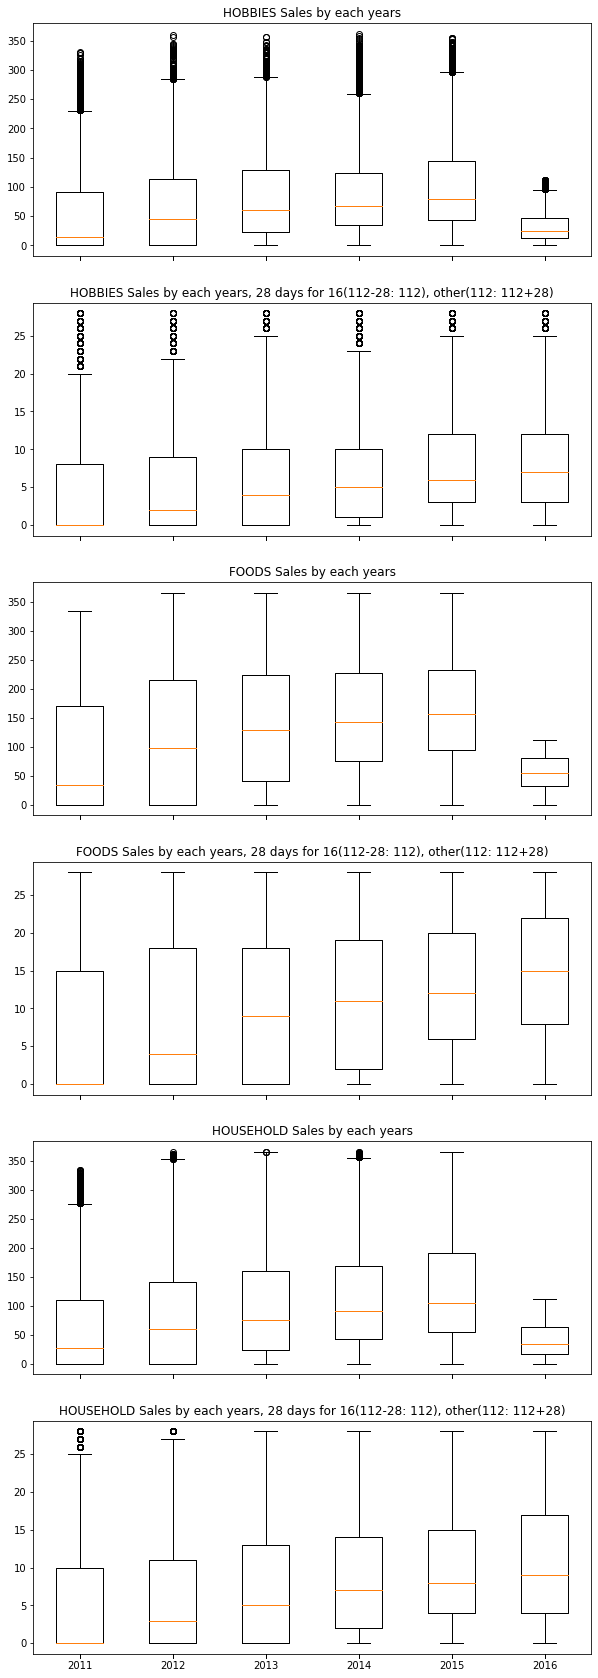

In [ ]:

_, ax = plt.subplots(nrows=6, figsize = (10, 30), sharex=True)

cat = [hobbies, hobbies, foods, foods, household, household]
title = [
          'HOBBIES Sales by each years',
         'HOBBIES Sales by each years, 28 days for 16(112-28: 112), other(112: 112+28)',
         'FOODS Sales by each years',
         'FOODS Sales by each years, 28 days for 16(112-28: 112), other(112: 112+28)',
         'HOUSEHOLD Sales by each years',
         'HOUSEHOLD Sales by each years, 28 days for 16(112-28: 112), other(112: 112+28)'
         ]

for i in range(6):
  
  c = cat[i]
  if i % 2 == 1:
    gr = [pd.Series((c.loc[:, y11[112:112+28]].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y12[112:112+28]].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y13[112:112+28]].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y14[112:112+28]].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y15[112:112+28]].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y16[112-28:]].values != 0).sum(axis = 1))]
  else:
    gr = [pd.Series((c.loc[:, y11].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y12].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y13].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y14].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y15].values != 0).sum(axis = 1)),
          pd.Series((c.loc[:, y16].values != 0).sum(axis = 1))]
  
  ax[i].boxplot(gr)
  ax[i].set_title(title[i]);
  ax[-1].set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016'])

## Sales by store and state


In [ ]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
by_stores = sales_train_val.groupby('store_id').sum(axis =1).iloc[:, 6:]

In [ ]:
roll = by_stores.rolling(90, axis=1).mean()
fig = make_subplots(rows=2, cols=1, subplot_titles=["Sales&RollSales diff", "Rolling Sales vs. store"])

fig.add_trace(
    go.Scatter(x = np.arange(roll.shape[1]), y = by_stores.iloc[1, :], mode='lines', marker=dict(color="red"), showlegend=True,
               name="Original"), row=1, col =1
              )

fig.add_trace(
    go.Scatter(x = np.arange(roll.shape[1]), y = roll.iloc[1, :], mode='lines', marker=dict(color="blue"), showlegend=True,
               name="Roll"), row=1, col =1
              )

for i in sales_train_val.store_id.unique():
  fig.add_trace(
      go.Box(y = roll.loc[i], showlegend=True,
                name= i), row=2, col=1
      )
  
fig.update_xaxes(title_text="Time", row=1, col=1)
fig.update_xaxes(title_text="Stores", row=2, col=1)
fig.update_yaxes(title_text="Sales", row=1, col=1)
fig.update_yaxes(title_text="Sales", row=2, col=1)
fig.update_layout(height = 800, width = 1000, title="Rolling Sales vs. store")

In [ ]:
fig = go.Figure()
for i in ['CA_1', 'CA_2', 'CA_3', 'CA_4']:
  fig.add_trace(
      go.Scatter(x = np.arange(roll.shape[1]), y = roll.loc[i], mode='lines', showlegend=True,
                name= i)
      )
  
fig.update_layout(height = 500, width = 800, yaxis_title="Sales", xaxis_title="Time", title="Rolling Sales vs. CA stores")

In [ ]:
fig = go.Figure()
for i in ['WI_1', 'WI_2', 'WI_3']:
  fig.add_trace(
      go.Scatter(x = np.arange(roll.shape[1]), y = roll.loc[i], mode='lines', showlegend=True,
                name= i)
      )
  
fig.update_layout(height = 500, width = 800, yaxis_title="Sales", xaxis_title="Time", title="Rolling Sales vs. WI stores")

In [ ]:
fig = go.Figure()
for i in ['TX_1', 'TX_2', 'TX_3']:
  fig.add_trace(
      go.Scatter(x = np.arange(roll.shape[1]), y = roll.loc[i], mode='lines', showlegend=True,
                name= i)
      )
  
fig.update_layout(height = 500, width = 800, yaxis_title="Sales", xaxis_title="Time", title="Rolling Sales vs. TX stores")

In [ ]:
by_state = sales_train_val.groupby('state_id').sum(axis =1).iloc[:, 6:]

In [ ]:
roll_state = by_state.rolling(90, axis=1).mean()
fig = make_subplots(rows=1, cols=1)# subplot_titles=["Sales State of California(CA)", 'Sales State of Texas(TX)', 'Sales State of Wisconsin(WI)'])

fig.add_trace(
    go.Scatter(x = np.arange(roll_state.shape[1]), y = roll_state.loc["CA"], mode='lines', showlegend=True,
               name= 'CA'), row =1, col=1
              )
fig.add_trace(
    go.Scatter(x = np.arange(roll_state.shape[1]), y = roll_state.loc["TX"], mode='lines', showlegend=True,
               name= 'TX'), row =1, col=1
              )
fig.add_trace(
    go.Scatter(x = np.arange(roll_state.shape[1]), y = roll_state.loc['WI'], mode='lines', showlegend=True,
               name= "WI"), row =1, col=1
              )
  
fig.update_layout(height = 800, width = 800, yaxis_title="Sales", xaxis_title="Time", title="Rolling Sales vs. States")

#Временные ряды

https://www.youtube.com/watch?v=nQjul-5_0_M

In [ ]:
You have to sort_index before rank:
https://stackoverflow.com/questions/35060846/pandas-group-by-index-value-then-calculate-quantile

#Models

Теперь я покажу, как можно прогнозировать продажи, используя различные методы, а именно: 
- naive approach,
- moving average,
- Holt linear,
- exponential smoothing,
- ARIMA,
- and Prophet


**Train/Val split**


Во-первых, нам необходимо создать миниатюрные обучающие и проверочные наборы для обучения и проверки наших моделей. Я буду использовать продажи за последние 30 дней в качестве данных проверки, а продажи за 120 дней до этого - в качестве данных обучения.

Нам необходимо прогнозировать продажи в данных проверки, используя продажи в данных обучения.

In [ ]:
d_col = [c for c in sales_train_val.columns if 'd_' in c]

train = sales_train_val[d_col[-150: -30]]
valid = sales_train_val[d_col[-30:]]

In [ ]:
fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

## Наивный подход (Naive approach)

Первый подход - очень простой наивный подход. Он просто прогнозирует продажи на следующий день как продажи за текущий день. Модель можно обобщить следующим образом:
$$\hat{y}_{t+1} = y_t$$

В приведенном выше уравнении yt + 1 - это прогнозируемое значение продаж на следующий день, а yt - сегодняшние продажи. Модель прогнозирует завтрашние продажи как сегодняшние продажи. Теперь давайте посмотрим, как эта простая модель работает с нашим миниатюрным набором данных.

Данные обучения отображаются синим цветом, данные проверки - оранжевым, а прогнозы - зеленым.

In [ ]:
pred = []
for i in range(len(valid.columns)):
  if i == 0:
    pred.append(train[train.columns[-1]].values)
  else:
    pred.append(valid[valid.columns[i-1]].values)
#нам нужно превернуть, 30 array for [30480] values, we need pred.shape is (30, 30480)
pred  =np.transpose([r.tolist() for r in pred])
# #we have 3 samples and we check it
error_naive = np.linalg.norm(pred[:3] - valid[:3].values)/30 #if all 0.83

In [ ]:
fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
  fig.add_trace(
    go.Scatter(
        x = np.arange(120, 150),
        y = pred[i],
        mode = 'lines', marker = dict(color = 'green'), showlegend=False, name="Predict"
    ), row =i+1, col =1
    )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

## Скользящая средняя (Moving average)
Метод скользящего среднего сложнее, чем наивный подход. Он рассчитывает средние продажи за предыдущие 30 (или любое другое число) дней и прогнозирует их как продажи на следующий день. Этот метод учитывает предыдущие 30 временных шагов и поэтому менее подвержен краткосрочным колебаниям, чем наивный подход. Модель можно обобщить следующим образом:

$$\hat{y}_{t+1} = \frac1{30} * \sum_{t-30}^t*y_n$$

В приведенном выше уравнении yt + 1 - продажи завтрашнего дня. С правой стороны все продажи за предыдущие 30 дней суммируются и делятся на 30, чтобы найти среднее значение. Это формирует прогноз модели, yt + 1. Теперь давайте посмотрим, как эта новая модель работает с нашим миниатюрным набором данных. Данные обучения отображаются синим цветом, данные проверки - оранжевым, а прогнозы - зеленым.

In [ ]:
pred = []
for t in range(120): 
  if t == 0:
    pred.append(np.mean(train[train.columns[-120:]].values, axis = 1))
  if t < 121 and t > 0:
    pred.append(0.5 * (np.mean(train[train.columns[-120+t:]].values, axis = 1) + np.mean(pred[:t], axis=0)))
  if t> 121:
    pred.append(np.mean([pred[:t]], axis=1))
#pred = np.transpose([i.tolist() for i in pred])
pred = train.rolling(90, axis = 1).mean().values[:, -30:]
error_avg = np.linalg.norm(pred[:, -30:][:3] -valid.values[:3])/30 #71.5

In [ ]:
error_avg

0.24872211122966223

In [ ]:
fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
  fig.add_trace(
    go.Scatter(
        x = np.arange(120, 150),
        y = pred[i],
        mode = 'lines', marker = dict(color = 'green'), showlegend=False, name="Predict"
    ), row =i+1, col =1
    )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

## Holt linear

Холт линейный
Линейный Холт полностью отличается от первых двух методов. Holt linear пытается захватить тренды высокого уровня в данных временных рядов, используя линейную функцию. Метод можно обобщить следующим образом:

Прогноз, уровень и уравнения тренда соответственно


В приведенных выше уравнениях α и β являются константами, которые могут быть сконфигурированы. Значения lt и bt репрезентативно представляют значения уровня и тренда. Значение тренда - это наклон функции линейного прогноза, а значение уровня - это y-точка пересечения функции линейного прогноза. Значения наклона и y-пересечения постоянно обновляются с использованием второго и третьего уравнений обновления. Наконец, значения наклона и точки пересечения y используются для вычисления прогноза yt + h (в уравнении 1), который на h временных шагов опережает текущий временной шаг.

In [ ]:
pred = []
for row in tqdm(train[train.columns[-120:]].values[:3]):
    fit = Holt(row).fit(smoothing_level = 0.3, smoothing_slope = 0.01)
    pred.append(fit.forecast(30))
pred = np.array(pred).reshape((-1, 30))
error_holt = np.linalg.norm(pred - valid.values[:len(pred)])/len(pred[0])
########

fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
  fig.add_trace(
    go.Scatter(
        x = np.arange(120, 150),
        y = pred[i],
        mode = 'lines', marker = dict(color = 'green'), showlegend=False, name="Predict"
    ), row =i+1, col =1
    )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

Мы видим, что Holt linear способен очень точно прогнозировать тенденции продаж высокого уровня. Но он не в состоянии точно так же точно отразить краткосрочную волатильность продаж, как другие методы. Может быть, этот метод может быть объединен с другими прогнозистами низкого уровня для получения лучших результатов.

## Exponential smoothing 

In [ ]:
pred = []
for row in tqdm(train[train.columns[-120:]].values[:3]):
    fit = ExponentialSmoothing(row, seasonal_periods=3).fit()
    pred.append(fit.forecast(30))
pred = np.array(pred).reshape((-1, 30))
error_es = np.linalg.norm(pred - valid.values[:len(pred)])/len(pred[0])
########

fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
  fig.add_trace(
    go.Scatter(
        x = np.arange(120, 150),
        y = pred[i],
        mode = 'lines', marker = dict(color = 'green'), showlegend=False, name="Predict"
    ), row =i+1, col =1
    )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

Мы можем видеть, что экспоненциальное сглаживание порождает горизонтальную линию каждый раз. Это потому, что он дает очень малый вес для отдаленных временных шагов, в результате чего прогнозы сглаживаются или остаются постоянными. Тем не менее, он способен прогнозировать средние продажи с превосходной точностью.


## ARIMA
ARIMA расшифровывается как Авто Регрессивная Интегрированная Скользящая Средняя. Хотя модели экспоненциального сглаживания основывались на описании тренда и сезонности в данных, модели ARIMA стремятся описать корреляции во временных рядах. 

In [ ]:
pred = []
for row in tqdm(train[train.columns[-120:]].values[:3]):
    fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
    pred.append(fit.forecast(30))
pred = np.array(pred).reshape((-1, 30))
error_arima = np.linalg.norm(pred - valid.values[:len(pred)])/len(pred[0])
########

fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
  fig.add_trace(
    go.Scatter(
        x = np.arange(120, 150),
        y = pred[i],
        mode = 'lines', marker = dict(color = 'green'), showlegend=False, name="Predict"
    ), row =i+1, col =1
    )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

ARIMA может одновременно находить тренды низкого и высокого уровня, в отличие от большинства других моделей, которые могут найти только одну из них. Он может предсказать периодическую функцию для каждой выборки, и эти функции кажутся довольно точными (за исключением второй выборки).

## Prophet
«Пророк» - это проект по прогнозированию временных рядов с открытым исходным кодом, разработанный Facebook.
Он основан на аддитивной модели, в которой нелинейные тренды соответствуют годовой, еженедельной и ежедневной сезонности,
включая влияние праздников. Это лучше всего работает с временными рядами,
которые имеют сильные сезонные эффекты и несколько сезонов исторических данных. 
Он также должен быть более устойчивым к отсутствующим данным и изменениям тренда по сравнению с другими моделями. 

In [ ]:
dates = ["2007-12-" + str(i) for i in range(1, 31)]
# dates2 = ["2007-11-" + str(i) for i in range(1, 31)]
# dates1 = ["2007-10-" + str(i) for i in range(1, 31)]
# dates = ["2007-09-" + str(i) for i in range(1, 31)]
# dates.extend(dates1)
# dates.extend(dates2)
# dates.extend(dates3)
pred = []
for row in tqdm(train[train.columns[-30:]].values[:3]):
    df = pd.DataFrame(np.transpose([dates, row]))
    df.columns = ["ds", "y"]
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)["yhat"].loc[30:].values
    pred.append(forecast)
pred = np.array(pred).reshape((-1, 30))
error_p = np.linalg.norm(pred - valid.values[:len(pred)])/len(pred[0])
########

fig = make_subplots(rows=3, cols = 1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles= [f'Sample_{i}' for i in range(1,4)])

for i in range(3):
  fig.add_trace(
      go.Scatter(
          x = np.arange(120),
          y = train.loc[i].values,
          mode = 'lines', marker = dict(color = 'blue'), showlegend=False, name="Train"
      ), row =i+1, col =1
  )
  fig.add_trace(
      go.Scatter(
          x = np.arange(120, 150),
          y = valid.loc[i].values,
          mode = 'lines', marker = dict(color = 'orange'), showlegend=False, name="Valid"
      ), row =i+1, col =1
  )
  fig.add_trace(
    go.Scatter(
        x = np.arange(120, 150),
        y = pred[i],
        mode = 'lines', marker = dict(color = 'green'), showlegend=False, name="Predict"
    ), row =i+1, col =1
    )
fig.update_xaxes(title_text="Days", row=3, col=1)
fig.update_yaxes(title_text= 'Counts', mirror=True)
fig.update_layout(height = 1000, width = 800)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


Пророк, кажется, выводит очень похожие прогнозы в ARIMA. Но при ближайшем рассмотрении мы видим, что существует макроскопическая тенденция к росту, которая отсутствовала в ARIMA. В предсказаниях ARIMA повторялась та же самая картина. Но в предсказаниях Пророка одна и та же модель смещается вертикально при каждом колебании. Это показывает, что способен захватывать тренды высокого уровня лучше, чем ARIMA.

In [ ]:
error_arima, error_es, error_holt, error_p

(0.3014988360234999,
 0.24705870922295028,
 0.2679337745816576,
 0.3014988360234999)


Производительность ARIMA и Prophet может быть увеличена за счет дополнительной настройки гиперпараметра.